# Data Science - Sprint 1

Importamos las librerías necesarias y disponibilizamos los datasets de train y test.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('https://raw.githubusercontent.com/Blassaj/Icaro_Data-Science/sprint1/train1.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Blassaj/Icaro_Data-Science/sprint1/test1.csv')

## Análisis descriptivo y visualización de datos

Vemos características básicas de cada dataset (dimensiones, atributos presentes y el tipo de dato que contienen, presencia de nulos y parámetros estadísticos de las variables numéricas).

In [ ]:
print(f'El dataset de entrenamiento tiene {df_train.shape[0]} filas y {df_train.shape[1]} columnas')
print(f'El dataset de testeo tiene {df_test.shape[0]} filas y {df_test.shape[1]} columnas')

El dataset de entrenamiento tiene 27656 filas y 16 columnas
El dataset de testeo tiene 4881 filas y 15 columnas


In [ ]:
df_train.columns    # Nombres de los atributos del dataset de entrenamiento

Index(['index', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'ID'],
      dtype='object')

In [ ]:
df_test.columns   # Nombres de los atributos del dataset de testeo (vemos que nuestro target= "income" no se encuentra presente)

Index(['index', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'ID'],
      dtype='object')

In [ ]:
df_train.info()   # Tipo de dato que contiene cada atributo presente en el dataset de entrenamiento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       27656 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      27656 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27656 non-null  object
 14  income          27656 non-null  object
 15  ID              27656 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


In [ ]:
df_test.info()   # Tipo de dato que contiene cada atributo presente en el dataset de testeo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           4881 non-null   int64 
 1   age             4881 non-null   int64 
 2   workclass       4881 non-null   object
 3   education       4881 non-null   object
 4   education.num   4881 non-null   int64 
 5   marital.status  4881 non-null   object
 6   occupation      4881 non-null   object
 7   relationship    4881 non-null   object
 8   race            4881 non-null   object
 9   sex             4881 non-null   object
 10  capital.gain    4881 non-null   int64 
 11  capital.loss    4881 non-null   int64 
 12  hours.per.week  4881 non-null   int64 
 13  native.country  4881 non-null   object
 14  ID              4881 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 572.1+ KB


Vemos que tanto en el conjunto de test como en el de entrenamiento no hay inconsistencia entre ellos, es decir, manejan el mismo tipo de datos y variables (excepto target, como ya lo aclaramos más arriba).

* Variables numéricas:

  - index: discreta
  - ID: discreta
  - age: continua (discretizada)
  - education.num: discreta
  - capital.gain: continua
  - capital.loss: continua
  - hours.per.week: discreta
  

* Variables categóricas:

  - workclass: nominal
  - education: ordinal
  - marital.status: nominal
  - occupation: nominal
  - relationship: nominal
  - race: nominal
  - sex: nominal
  - native.country: nominal 
  - income: nominal


### Análisis de estadística descriptiva en cada dataset.

In [ ]:
round(df_train.describe(),2)   #  Parámetros estadísticos de los atributos numéricos del dataset de entrenamiento

,index,age,education.num,capital.gain,capital.loss,hours.per.week,ID
count,27656.00,27656.00,27656.00,27656.00,27656.00,27656.00,27656.00
mean,16274.89,38.61,10.09,1099.99,88.28,40.45,16267.57
std,9410.04,13.66,2.57,7487.32,405.82,12.37,9403.09
min,0.00,17.00,1.00,0.00,0.00,1.00,0.00
25%,8104.75,28.00,9.00,0.00,0.00,40.00,8104.75
50%,16296.00,37.00,10.00,0.00,0.00,40.00,16291.00
75%,24431.25,48.00,12.00,0.00,0.00,45.00,24416.25
max,32559.00,90.00,16.00,99999.00,4356.00,99.00,32535.00


In [ ]:
df_train.describe(include='O')  # Parámetros estadísticos de los atributos categóricos del dataset de entrenamiento

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,27656,27656,27656,27656,27656,27656,27656,27656,27656
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,19279,8934,12720,3539,11208,23621,18521,24811,20953


En el resumen para variables categóricas ya podemos observar que nuestra variable target, income, tiene una cantidad de valores desproporcional en sus categorías "<=50K" y ">50K". Esto es de 27.656 registros en df_train, 20.953 corresponden a personas que ganan menos de 50 mil dólares.

In [ ]:
round(df_test.describe(),2)   #  Parámetros estadísticos de los atributos numéricos del dataset de testeo

,index,age,education.num,capital.gain,capital.loss,hours.per.week,ID
count,4881.00,4881.00,4881.00,4881.00,4881.00,4881.00,4881.00
mean,16277.74,38.44,10.02,956.35,82.18,40.40,16270.46
std,9341.93,13.51,2.60,6797.00,387.33,12.22,9335.01
min,6.00,17.00,1.00,0.00,0.00,1.00,6.00
25%,8278.00,27.00,9.00,0.00,0.00,40.00,8278.00
50%,16173.00,37.00,10.00,0.00,0.00,40.00,16168.00
75%,24343.00,47.00,12.00,0.00,0.00,45.00,24328.00
max,32560.00,90.00,16.00,99999.00,3770.00,99.00,32536.00


In [ ]:
df_test.describe(include='O')   # Parámetros estadísticos de los atributos categóricos del dataset de testeo

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,4881,4881,4881,4881,4881,4881,4881,4881
unique,7,16,7,15,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
freq,3394,1560,2250,615,1979,4174,3254,4342


Si observamos los valores de la media, mediana y desvío de cada variable numérica en los resúmenes de cada dataset podemos ver que sus valores son similares, por ejemplo, en el conjunto de datos de entrenamiento tenemos para la variable age una media de $38.61$, un desvío estándar de $13.65$  y una mediana de $37$ años; si ahora observamos los mismos estadísticos pero en el conjunto test observamos una media de $38,44$, un desvío de $13.51$ y una mediana de $37$ años.

Estos valores son muy similares lo que indica la presencia de aleatoriedad en el método de selección de ambos conjuntos.

### Presencia de valores faltantes.

In [ ]:
df_train.isna().sum()   #  Contamos la cantidad de registros nulos que tenemos en nuestro dataset de entrenamiento

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64

In [ ]:
df_test.isna().sum()   #  Contamos la cantidad de registros nulos que tenemos en nuestro dataset de entrenamiento

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
ID                0
dtype: int64

No hay presencia de valores faltantes en ninguno de los dos dataset por lo que no hará falta imputación de ningún tipo.

### Visualización de datos.

Acontinuación estudiaremos distribucion y comportamiento de las variables por medio de gráficos. Comenzaremos con las variables categóricas para las cuales utilizaremos gráficos de barras y luego con las variables numéricas para las cuales usaremos histogramas y boxplots.

#### Variables categóricas.

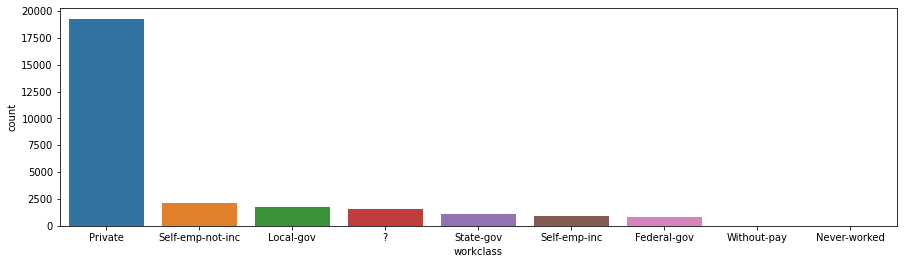

In [ ]:
# Ploteo de la variable workclass
plt.figure(figsize=(15,4))
sns.countplot(x='workclass', data= df_train, order = df_train['workclass'].value_counts().index)
plt.show()

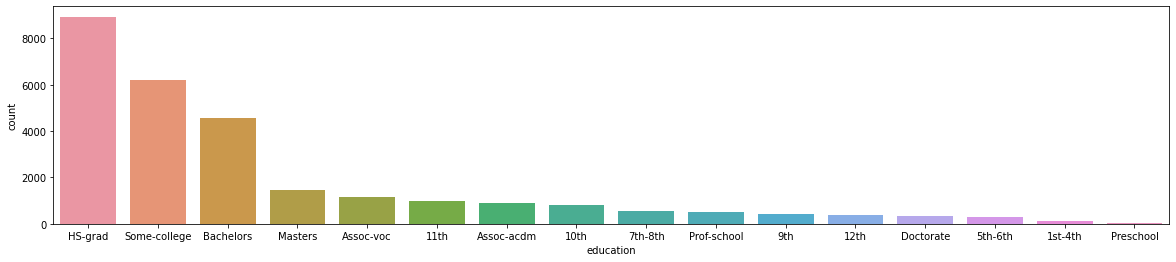

In [ ]:
# Ploteo de la variable education
plt.figure(figsize=(20,4))
sns.countplot(x='education', data= df_train, order = df_train['education'].value_counts().index)
plt.show()

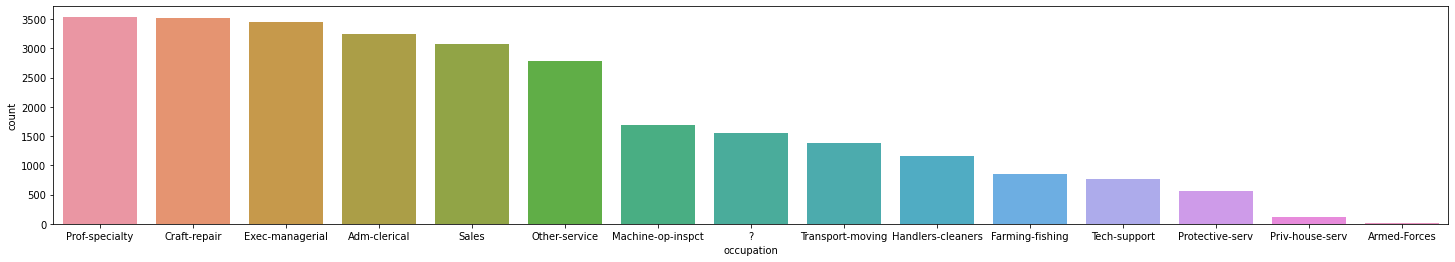

In [ ]:
# Ploteo de la variable occupation
plt.figure(figsize=(25,4))
sns.countplot(x='occupation', data= df_train, order = df_train['occupation'].value_counts().index)
plt.show()

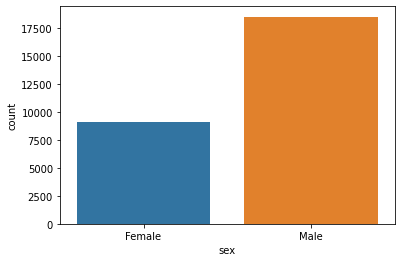

In [ ]:
# Ploteo de la variable sex
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data= df_train)
plt.show()

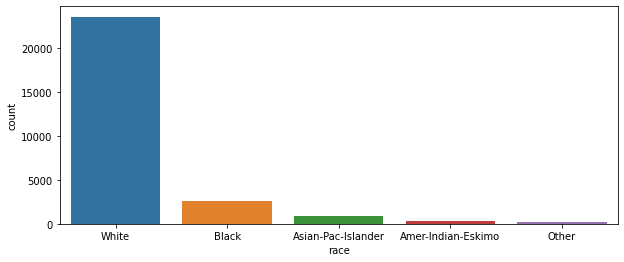

In [ ]:
# Ploteo de la variable race
plt.figure(figsize=(10,4))
sns.countplot(x='race', data= df_train)
plt.show()

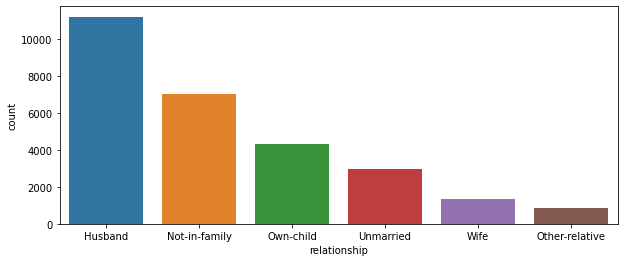

In [ ]:
# Ploteo de la variable relationship
plt.figure(figsize=(10,4))
sns.countplot(x='relationship', data= df_train, order = df_train['relationship'].value_counts().index)
plt.show()

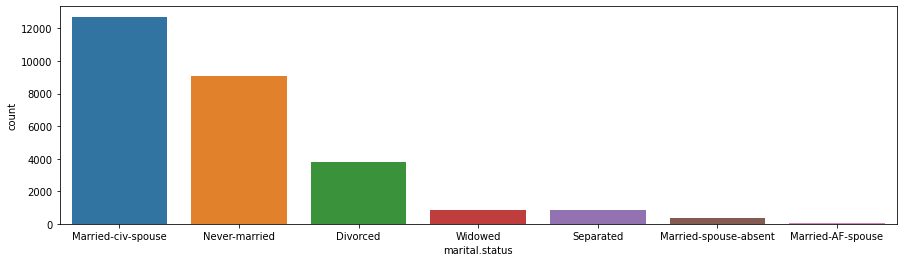

In [ ]:
# Ploteo de la variable marital.status
plt.figure(figsize=(15,4))
sns.countplot(x='marital.status', data= df_train, order = df_train['marital.status'].value_counts().index)
plt.show()

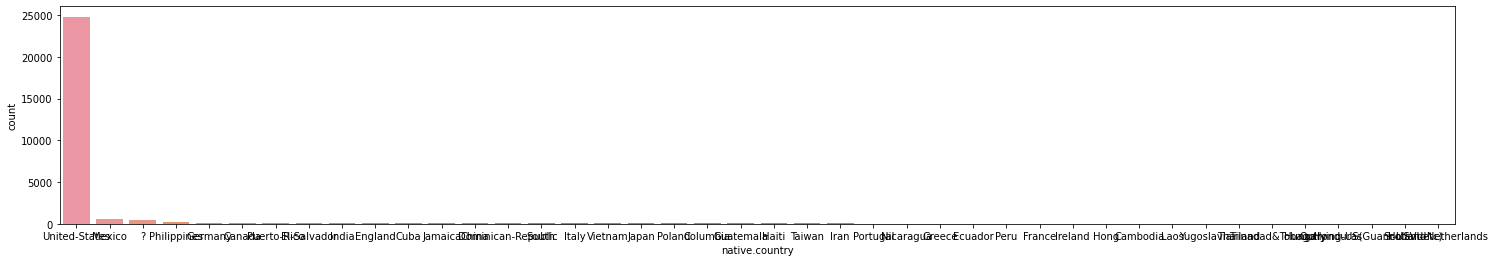

In [ ]:
# Ploteo de la variable native.country
plt.figure(figsize=(25,4))
sns.countplot(x='native.country', data= df_train, order = df_train['native.country'].value_counts().index)
plt.show()

### Procesamiento de las variables categóricas.

#### Atributo "workclass":

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [ ]:
df_train['workclass'].unique()    # Vemos los tipos de "workclass" presentes en el dataset de entrenamiento

array(['Local-gov', 'Private', 'Federal-gov', 'Self-emp-not-inc', '?',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df_test['workclass'].unique()   # Vemos los tipos de "workclass" presentes en el dataset de testeo

array(['Private', '?', 'Self-emp-inc', 'Local-gov', 'State-gov',
       'Self-emp-not-inc', 'Federal-gov'], dtype=object)

In [ ]:
# Verificamos que tipos de workclass no están presentes en el dataset de testeo.
workclass_train = df_train['workclass'].unique()
workclass_test = df_test['workclass'].unique()

extra_test = []

for i in workclass_train:
  if i not in workclass_test:
    extra_test.append(i)

print(f'Los tipos {extra_test} figuran en el atributo workclass dentro del dataset de entrenamiento pero NO en el de testeo.')

Los tipos ['Without-pay', 'Never-worked'] figuran en el atributo workclass dentro del dataset de entrenamiento pero NO en el de testeo.


In [ ]:
# Extraemos los registros que corresponden a '?'
#df_train['workclass'] = df_train[df_train['workclass'] != '?']['workclass']
df_train = df_train.loc[(df_train['workclass'] != '?')]
#df_test['workclass'] = df_test[df_test['workclass'] != '?']['workclass']
df_test = df_test.loc[(df_test['workclass'] != '?')]

In [ ]:
# Aplicamos un etiquetado numerico al atributo workclass en nuestro dataset de entrenamiento
df_train['workclass_enc'] = lab_enc.fit_transform(df_train.workclass)

In [ ]:
# Teniendo en cuenta que no tenemos todos los tipos de workclass en el dataset de testeo aplicamos un "replace" en función del etiquetado del dataset de entrenamiento
workclass_dict = {
    'Federal-gov': 1,
    'Local-gov': 2,
    'Private': 4,
    'Self-emp-inc': 5,
    'Self-emp-not-inc': 6,
    'State-gov': 7
}

df_test['workclass_enc'] = df_test['workclass'].replace(workclass_dict)

#### Atributo "education" y "education.num"

In [ ]:
# Creamos un dataset que solo contenga los atributos "education" y "education.num" para chequear si el etiquetado el ordinal.
df_train_ed = df_train.drop(['index','age','workclass','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income','ID','workclass_enc'], axis= 1)

df_train_ed.shape

(26117, 2)

In [ ]:
ed = []

for i in range(1,len(df_train_ed['education'].unique())+1):
  ed.append(df_train_ed[df_train_ed['education.num']==i].head(1))

print(ed)   # Se encuentran correctamente ordenadas siendo 1 la más básica y 16 la más avanzada. 

[     education  education.num
833  Preschool              1,    education  education.num
24   1st-4th              2,    education  education.num
32   5th-6th              3,   education  education.num
9   7th-8th              4,    education  education.num
41       9th              5,    education  education.num
85      10th              6,    education  education.num
92      11th              7,     education  education.num
113      12th              8,   education  education.num
0   HS-grad              9,       education  education.num
6  Some-college             10,     education  education.num
13  Assoc-voc             11,      education  education.num
18  Assoc-acdm             12,    education  education.num
1  Bachelors             13,    education  education.num
15   Masters             14,       education  education.num
35  Prof-school             15,      education  education.num
175  Doctorate             16]


In [ ]:
df_train_ed['education'].nunique()

16

#### Atributo "marital.status"

In [ ]:
df_train['marital.status'].unique()   # Vemos los tipos de "marital.status" presentes en el dataset de entrenamiento

array(['Divorced', 'Married-civ-spouse', 'Never-married', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
df_test['marital.status'].unique()   # Vemos los tipos de "marital.status" presentes en el dataset de testeo

array(['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
# Aplicamos un etiquetado numerico al atributo "marital.status" en nuestro dataset de entrenamiento
df_train['marital.status_enc'] = lab_enc.fit_transform(df_train['marital.status'])

In [ ]:
# Aplicamos un etiquetado numerico al atributo "marital.status" en nuestro dataset de testeo
df_test['marital.status_enc'] = lab_enc.transform(df_test['marital.status'])

#### Atributo "occupation"

In [ ]:
df_train['occupation'].unique()   # Vemos los tipos de "occupation" presentes en el dataset de entrenamiento

array(['Protective-serv', 'Exec-managerial', 'Craft-repair',
       'Prof-specialty', 'Tech-support', 'Other-service',
       'Transport-moving', 'Adm-clerical', 'Farming-fishing',
       'Handlers-cleaners', 'Sales', 'Machine-op-inspct',
       'Priv-house-serv', 'Armed-Forces', '?'], dtype=object)

In [ ]:
df_test['occupation'].unique()   # Vemos los tipos de "occupation" presentes en el dataset de testeo

array(['Machine-op-inspct', 'Prof-specialty', 'Adm-clerical',
       'Craft-repair', 'Sales', 'Exec-managerial', 'Other-service',
       'Handlers-cleaners', 'Protective-serv', 'Transport-moving',
       'Tech-support', 'Priv-house-serv', 'Farming-fishing',
       'Armed-Forces'], dtype=object)

In [ ]:
# Extraemos los registros que corresponden a '?'
#df_train['occupation'] = df_train[df_train['occupation'] != '?']['occupation']
df_train = df_train.loc[(df_train['occupation'] != '?')]
#df_test['occupation'] = df_test[df_test['occupation'] != '?']['occupation']
df_test = df_test.loc[(df_test['occupation'] != '?')]

In [ ]:
# Aplicamos un etiquetado numerico al atributo "occupation" en nuestro dataset de entrenamiento
df_train['occupation_enc'] = lab_enc.fit_transform(df_train['occupation'])

In [ ]:
# Aplicamos un etiquetado numerico al atributo "occupation" en nuestro dataset de testeo
df_test['occupation_enc'] = lab_enc.transform(df_test['occupation'])

#### Atributo "relationship"

In [ ]:
df_train['relationship'].unique()   # Vemos los tipos de "relationship" presentes en el dataset de entrenamiento

array(['Own-child', 'Wife', 'Husband', 'Not-in-family', 'Unmarried',
       'Other-relative'], dtype=object)

In [ ]:
df_test['relationship'].unique()   # Vemos los tipos de "relationship" presentes en el dataset de testeo

array(['Husband', 'Wife', 'Not-in-family', 'Unmarried', 'Own-child',
       'Other-relative'], dtype=object)

In [ ]:
# Aplicamos un etiquetado numerico al atributo "relationship" en nuestro dataset de entrenamiento
df_train['relationship_enc'] = lab_enc.fit_transform(df_train['relationship'])

In [ ]:
# Aplicamos un etiquetado numerico al atributo "relationship" en nuestro dataset de testeo
df_test['relationship_enc'] = lab_enc.transform(df_test['relationship'])

#### Atributo "race"

In [ ]:
df_train['race'].unique()   # Vemos los tipos de "race" presentes en el dataset de entrenamiento

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [ ]:
df_test['race'].unique()   # Vemos los tipos de "race" presentes en el dataset de testeo

array(['White', 'Black', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

In [ ]:
# Aplicamos un etiquetado numerico al atributo "race" en nuestro dataset de entrenamiento
df_train['race_enc'] = lab_enc.fit_transform(df_train['race'])

In [ ]:
# Aplicamos un etiquetado numerico al atributo "race" en nuestro dataset de testeo
df_test['race_enc'] = lab_enc.transform(df_test['race'])

#### Atributo "sex"

In [ ]:
df_train['sex'].unique()   # Vemos los tipos de "sex" presentes en el dataset de entrenamiento

array(['Female', 'Male'], dtype=object)

In [ ]:
df_test['sex'].unique()   # Vemos los tipos de "sex" presentes en el dataset de testeo

array(['Male', 'Female'], dtype=object)

In [ ]:
# Aplicamos un etiquetado numerico al atributo "sex" en nuestro dataset de entrenamiento
df_train['sex_enc'] = lab_enc.fit_transform(df_train['sex'])

In [ ]:
# Aplicamos un etiquetado numerico al atributo "sex" en nuestro dataset de testeo
df_test['sex_enc'] = lab_enc.transform(df_test['sex'])

#### Atributo "native.country"

In [ ]:
df_train['native.country'].unique()   # Vemos los tipos de "native.country" presentes en el dataset de entrenamiento

array(['United-States', '?', 'Jamaica', 'India', 'Mexico', 'Philippines',
       'Dominican-Republic', 'El-Salvador', 'China', 'Thailand',
       'Ireland', 'Laos', 'Iran', 'France', 'Guatemala', 'South',
       'Puerto-Rico', 'Japan', 'Portugal', 'Greece', 'Canada', 'Poland',
       'Peru', 'Cuba', 'Columbia', 'Germany', 'Italy', 'Hong', 'Haiti',
       'Ecuador', 'England', 'Nicaragua', 'Cambodia', 'Trinadad&Tobago',
       'Vietnam', 'Honduras', 'Taiwan', 'Scotland', 'Yugoslavia',
       'Hungary', 'Outlying-US(Guam-USVI-etc)', 'Holand-Netherlands'],
      dtype=object)

In [ ]:
df_test['native.country'].unique()   # Vemos los tipos de "native.country" presentes en el dataset de testeo

array(['United-States', 'Puerto-Rico', '?', 'Ireland', 'Vietnam', 'Peru',
       'Mexico', 'Germany', 'Columbia', 'France', 'Taiwan', 'Philippines',
       'Haiti', 'India', 'South', 'Trinadad&Tobago', 'Canada', 'Poland',
       'Guatemala', 'Cambodia', 'Cuba', 'England', 'Jamaica', 'Laos',
       'Dominican-Republic', 'Nicaragua', 'Ecuador', 'China', 'Japan',
       'Portugal', 'Italy', 'Outlying-US(Guam-USVI-etc)', 'El-Salvador',
       'Iran', 'Hungary', 'Thailand', 'Honduras', 'Greece', 'Hong',
       'Scotland', 'Yugoslavia'], dtype=object)

In [ ]:
# Extraemos los registros que corresponden a '?'
#df_train['native.country'] = df_train[df_train['native.country'] != '?']['native.country']
df_train = df_train.loc[(df_train['native.country'] != '?')]
#df_test['native.country'] = df_test[df_test['native.country'] != '?']['native.country']
df_test = df_test.loc[(df_test['native.country'] != '?')]

In [ ]:
# Verificamos que nacionalidades no están presentes en el dataset de testeo.
native_country_train = df_train['native.country'].unique()
native_country_test = df_test['native.country'].unique()

extra_test2 = []

for i in native_country_train:
  if i not in native_country_test:
    extra_test2.append(i)

print(f'Los tipos {extra_test2} figuran en el atributo "native.country" dentro del dataset de entrenamiento pero NO en el de testeo.')

Los tipos ['Holand-Netherlands'] figuran en el atributo "native.country" dentro del dataset de entrenamiento pero NO en el de testeo.


In [ ]:
df_train[df_train['native.country']=='Holand-Netherlands'].shape[0]   #   Como es un solo registro es preferible dropearlo del dataset de entrenamiento

1

In [ ]:
# Eliminamos el registro correspondiente a la nacionalidad Holandesa
df_train = df_train.drop(df_train[df_train['native.country']=='Holand-Netherlands'].index[0], axis= 0)

In [ ]:
# Aplicamos un etiquetado numerico al atributo "native.country" en nuestro dataset de entrenamiento
df_train['native.country_enc'] = lab_enc.fit_transform(df_train['native.country'])

In [ ]:
# Aplicamos un etiquetado numerico al atributo "nativev.country" en nuestro dataset de testeo
df_test['native.country_enc'] = lab_enc.transform(df_test['native.country'])

#### Atributo "income"

In [ ]:
df_train['income'].unique()   # Vemos los tipos de "income" presentes en el dataset de entrenamiento

array(['<=50K', '>50K'], dtype=object)

In [ ]:
#  Reemplazamos los valores categóricos del atributo "income" por los solicitados en la consigna.
income_dict = {
    '<=50K': 0,
    '>50K': 1,
}

df_train['income_enc'] = df_train['income'].replace(income_dict)

In [ ]:
# EL CHEQUEO DE ATRIBUTOS ENTRE EL TRAIN Y TEST SE PUEDE HACER DE UNA CON ESTA FUNCIÓN
"""
## Función para comparar los datos entre columnas del data train y el data set
columns= ['workclass', 'education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

def comparar(columns):
  for i in columns:
      extra_test=[]
      for x in df_train[i].unique():
        if x not in df_test[i].unique():
          extra_test.append(x)
  
      print(f" La data {extra_test} se encuentra en el data train pero no en el testeo")

comparar(columns)
"""
# TAMBIEN CON UN CICLO FOR SE PODRÍA APLICAR UN LABEL ENCODER AUTOMATICAMENTE 

'\n## Función para comparar los datos entre columnas del data train y el data set\ncolumns= [\'workclass\', \'education\',\'marital.status\', \'occupation\', \'relationship\', \'race\', \'sex\', \'native.country\']\n\ndef comparar(columns):\n  for i in columns:\n      extra_test=[]\n      for x in df_train[i].unique():\n        if x not in df_test[i].unique():\n          extra_test.append(x)\n  \n      print(f" La data {extra_test} se encuentra en el data train pero no en el testeo")\n\ncomparar(columns)\n'

Dropeamos los atributos categóricos de los dataset de entrenamiento y testeo para poder aplicar algoritmos de clasificación supervisada.

In [ ]:
#   Dropeamos los atributos categoricos del dataset de entrenamiento
df_train2 = df_train.drop(['education', 'workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income'], axis= 1)

In [ ]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25628 entries, 0 to 27655
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   index               25628 non-null  int64
 1   age                 25628 non-null  int64
 2   education.num       25628 non-null  int64
 3   capital.gain        25628 non-null  int64
 4   capital.loss        25628 non-null  int64
 5   hours.per.week      25628 non-null  int64
 6   ID                  25628 non-null  int64
 7   workclass_enc       25628 non-null  int64
 8   marital.status_enc  25628 non-null  int64
 9   occupation_enc      25628 non-null  int64
 10  relationship_enc    25628 non-null  int64
 11  race_enc            25628 non-null  int64
 12  sex_enc             25628 non-null  int64
 13  native.country_enc  25628 non-null  int64
 14  income_enc          25628 non-null  int64
dtypes: int64(15)
memory usage: 3.1 MB


In [ ]:
#   Dropeamos los atributos categoricos del dataset de testeo
df_test2 = df_test.drop(['education', 'workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'], axis= 1)

In [ ]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4510 entries, 0 to 4880
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   index               4510 non-null   int64
 1   age                 4510 non-null   int64
 2   education.num       4510 non-null   int64
 3   capital.gain        4510 non-null   int64
 4   capital.loss        4510 non-null   int64
 5   hours.per.week      4510 non-null   int64
 6   ID                  4510 non-null   int64
 7   workclass_enc       4510 non-null   int64
 8   marital.status_enc  4510 non-null   int64
 9   occupation_enc      4510 non-null   int64
 10  relationship_enc    4510 non-null   int64
 11  race_enc            4510 non-null   int64
 12  sex_enc             4510 non-null   int64
 13  native.country_enc  4510 non-null   int64
dtypes: int64(14)
memory usage: 528.5 KB


### Visualización de datos

#### Variables numéricas de entrenamiento.

In [ ]:
# Separamos los atributos discretos de nuestro dataset de entrenamiento.
plots_train = df_train2.drop(['index','education.num','workclass_enc','marital.status_enc','occupation_enc','relationship_enc','race_enc','sex_enc','income_enc','ID'], axis= 1)

columns= plots_train.columns
print(columns)

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country_enc'],
      dtype='object')


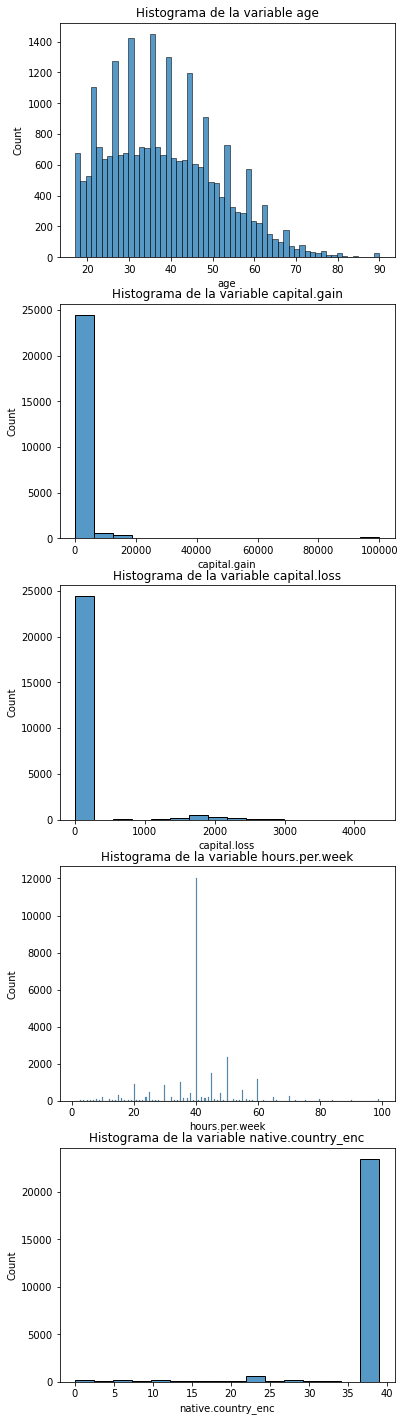

In [ ]:
# Generamos un histograma para cada atributo numérico y así poder visualizar la distribución de los datos
fig, axes = plt.subplots(nrows= len(columns), figsize= (6,25))

for i in range(len(columns)):
  axes[i].set_title(f'Histograma de la variable {columns[i]}')
  sns.histplot(x= plots_train[columns[i]], ax= axes[i])
plt.show()

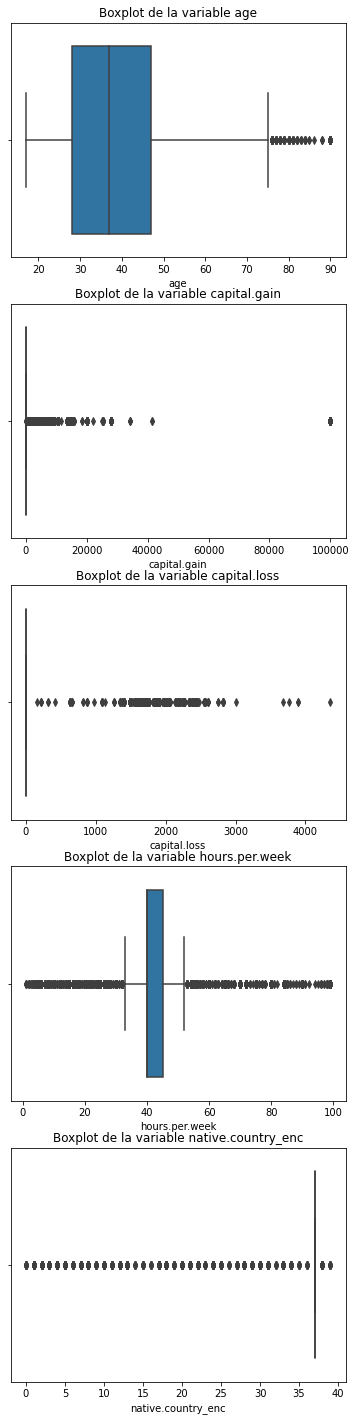

In [ ]:
# Generamos un boxplot para cada uno y así poder visualizar la presencia de outliers
fig, axes = plt.subplots(nrows= len(columns), figsize= (6,25))

for i in range(len(columns)):
  axes[i].set_title(f'Boxplot de la variable {columns[i]}')
  sns.boxplot(x= plots_train[columns[i]], ax= axes[i])
plt.show()

In [ ]:
# Cantidad de registros igual a cero de capital.loss
df_l = df_train[df_train['capital.loss']==0]
df_l_0 = df_l['capital.loss'].count() / len(df_train) * 100

print(f'El {round(df_l_0, 2)}% de los registros de la variable capital.loss toman valores igual a cero.' )

El 95.25% de los registros de la variable capital.loss toman valores igual a cero.


In [ ]:
# Cantidad de registros igual a cero de capital.gain
df_g = df_train[df_train['capital.gain']==0]
d_g_0 = df_g['capital.gain'].count() / len(df_train) * 100

print(f'El {round(d_g_0, 2)}% de los registros de la variable capital.gain toman valores igual a cero.' )

El 91.57% de los registros de la variable capital.gain toman valores igual a cero.


##### Remosión de outliers 

In [ ]:
# Funcion para remosión de outliers
def no_outliers(df, var):
  q1 = df[var].quantile(0.25)
  q3 = df[var].quantile(0.75)

  iqr = q3 - q1

  min = q1 - (1.5 * iqr)
  max = q3 + (1.5 * iqr)

  df_no_outl = df.loc[(df[var] < max) & (df[var] > min)]
  return df_no_outl

In [ ]:
# Eliminamos los outliers del atributo age unicamente debido a que es el unico que presenta valores continuos y una distribución similar a la normal
df_train2 = no_outliers(df_train2, 'age')

df_train2.shape

(25483, 15)

#### Variables numéricas de testeo

In [ ]:
# Separamos los atributos numericos de nuestro dataset de testeo.
plots_test = df_test2.drop(['index','education.num','workclass_enc','marital.status_enc','occupation_enc','relationship_enc','race_enc','sex_enc','ID'], axis= 1)

columns= plots_test.columns
print(columns)

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country_enc'],
      dtype='object')


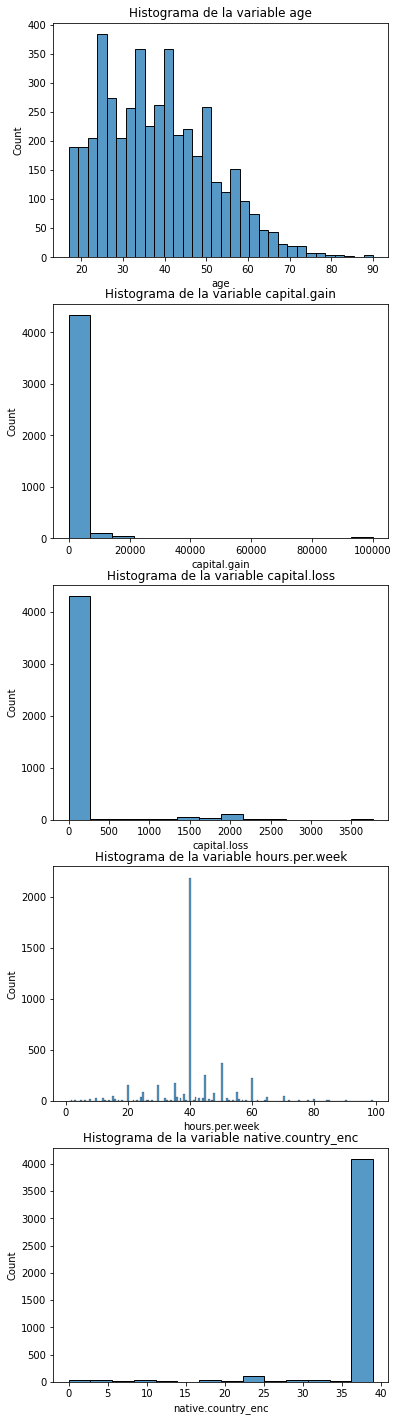

In [ ]:
# Generamos un boxplot para cada uno y así poder visualizar la presencia de outliers
fig, axes = plt.subplots(nrows= len(columns), figsize= (6,25))

for i in range(len(columns)):
  axes[i].set_title(f'Histograma de la variable {columns[i]}')
  sns.histplot(x= plots_test[columns[i]], ax= axes[i])
plt.show()

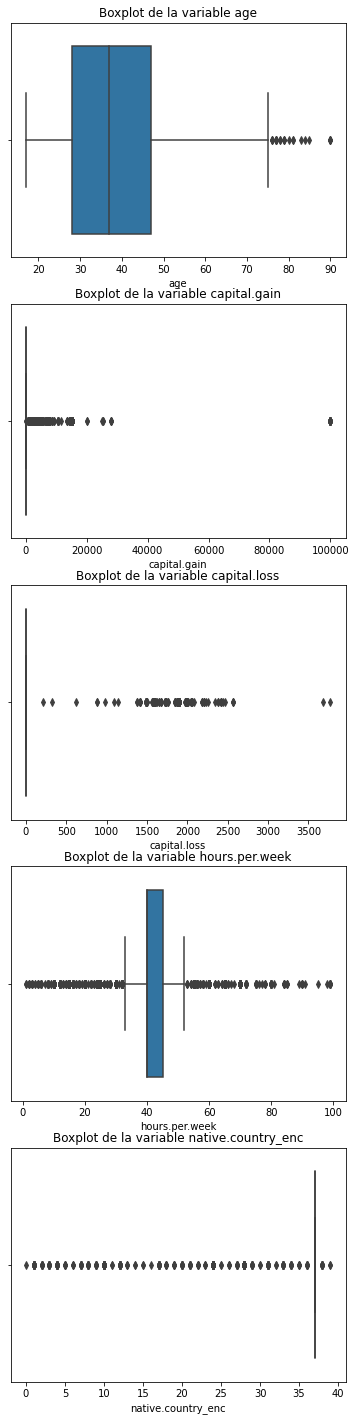

In [ ]:
# Generamos un boxplot para cada uno y así poder visualizar la presencia de outliers
fig, axes = plt.subplots(nrows= len(columns), figsize= (6,25))

for i in range(len(columns)):
  axes[i].set_title(f'Boxplot de la variable {columns[i]}')
  sns.boxplot(x= plots_test[columns[i]], ax= axes[i])
plt.show()

##### Remosión de outliers

In [ ]:
# Eliminamos los outliers del atributo age unicamente debido a que es el unico que presenta valores continuos y una distribución similar a la normal
df_test2 = no_outliers(df_test2, 'age')

df_test2.shape

(4487, 14)

### Matriz de correlación entre los atributos de nuestro set de entrenamiento.

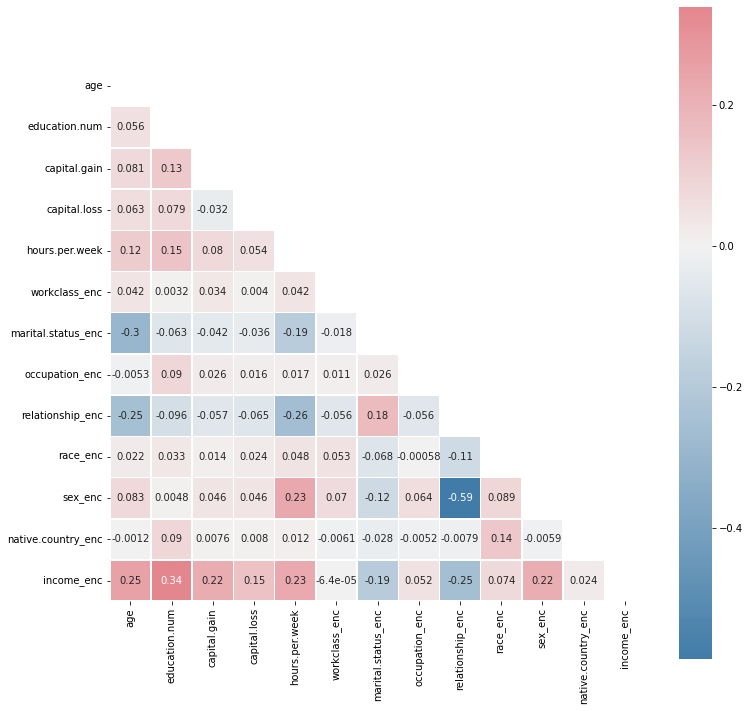

In [ ]:
# Creamos una máscara para el triangulo superior de la matriz, previamente sacamos los atributos ID e index por no tener relación con los demás atributos.
input = df_train2.drop(['ID','index'], axis= 1)
mask = np.triu(np.ones_like(input.corr(), dtype=bool))

# Generamos un lienzo o figura donde plotear
f, ax = plt.subplots(figsize=(12, 12))

# Mapa de colores divergente
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Ploteamos el heatmap con la máscara y el ratio de imagen correcto (cuadrado)
sns.heatmap(input.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

#### Correlacion de atributos con nuestro target.

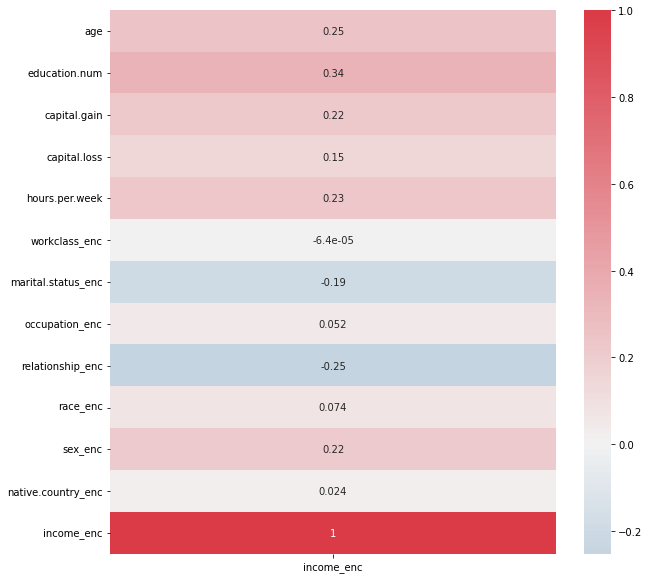

In [ ]:
target_corr = pd.DataFrame(input.corr()['income_enc'], index= input.corr().index)

plt.figure(figsize=(10,10))
sns.heatmap(target_corr, annot=True, cmap=cmap, center=0)

plt.show()

## Modelado

### Arboles de Decisión

#### Benchmark

In [ ]:
# Importamos la librería necesaria para subdividir el dataset de entrenamiento.
from sklearn.model_selection import train_test_split

In [ ]:
# Subdividimos el dataset de entrenamiento (el único que contiene información de nuestro target)
X = df_train2.drop(['income_enc'], axis= 1)
y = df_train2["income_enc"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0, stratify= y)

In [ ]:
# Entrenamos nuestro DecisionTree evaluando distintas profundidades del árbol para determinar el punto óptimo entre under y overfitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depths = np.arange(1, 20)
train_acc_scores = []
test_acc_scores = []

for i in max_depths:
  tree = DecisionTreeClassifier(max_depth=i)

  tree.fit(X_train, y_train)
  train_preds = tree.predict(X_train)
  test_preds = tree.predict(X_test)

  train_acc_scores.append(accuracy_score(y_train, train_preds))
  test_acc_scores.append(accuracy_score(y_test, test_preds))

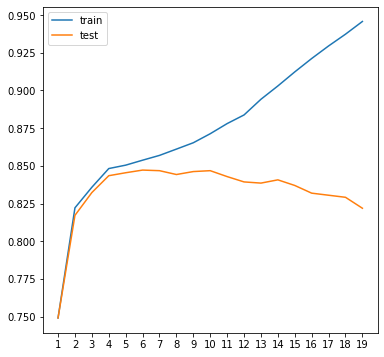

In [ ]:
# Ploteamos los valores de exactitud para nuestro dataset de entrenamiento y testeo.
plt.figure(figsize=(6,6))

plt.plot(max_depths, train_acc_scores, label="train")
plt.plot(max_depths, test_acc_scores,  label="test")
plt.xticks(max_depths)
plt.legend()

Vemos como la exactitud aumenta a medida que aumenta el max depth, pero a partir de la profundidad 6, se separan ambas lineas (comienza a overfittear) por lo que avanzaremos con un max_depth= 6.

In [ ]:
# Entrenamos el árbol con max_depth= 6 (incluyendo cross validation).
from sklearn.metrics import f1_score

tree_final = DecisionTreeClassifier(max_depth= 6)
tree.fit(X_train, y_train)
train_preds = tree.predict(X_train)
test_preds = tree.predict(X_test)

In [ ]:
# Evaluamos las métricas de predicción sobre nuestro target
acc = accuracy_score(y_test, test_preds)
f_score = f1_score(y_test, test_preds)

print(f'La exactitud lograda a partir de un modelo de arbol de decisión fue: {acc}')
print(f'El f-score logrado a partir de un modelo de arbol de decisión fue: {f_score}')

La exactitud lograda a partir de un modelo de arbol de decisión fue: 0.8275456150676869
El f-score logrado a partir de un modelo de arbol de decisión fue: 0.6459927507047926


#### Seleccion manual de features (correlación mayor a 20% con nuestro target)

In [ ]:
# Subdividimos el dataset de entrenamiento (el único que contiene información de nuestro target)
X1 = df_train2[['age','education.num','capital.gain','hours.per.week','sex_enc','relationship_enc','marital.status_enc']]
y1 = df_train2["income_enc"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state= 0, stratify= y1)

In [ ]:
# Entrenamos nuestro DecisionTree evaluando distintas profundidades del árbol para determinar el punto óptimo entre under y overfitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depths = np.arange(1, 20)
train_acc_scores1 = []
test_acc_scores1 = []

for i in max_depths:
  tree2 = DecisionTreeClassifier(max_depth=i)

  tree2.fit(X_train1, y_train1)
  train_preds = tree2.predict(X_train1)
  test_preds = tree2.predict(X_test1)

  train_acc_scores1.append(accuracy_score(y_train1, train_preds))
  test_acc_scores1.append(accuracy_score(y_test1, test_preds))

In [ ]:
# Ploteamos el clasification report del arbol
from sklearn.metrics import classification_report
print(classification_report(y_test1, tree2.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3818
           1       0.64      0.56      0.60      1279

    accuracy                           0.81      5097
   macro avg       0.75      0.73      0.74      5097
weighted avg       0.81      0.81      0.81      5097



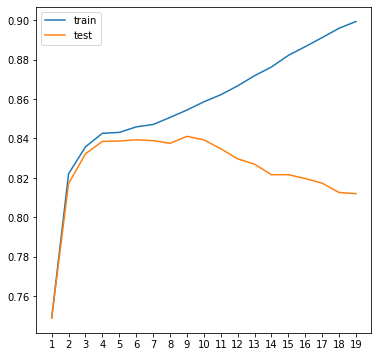

In [ ]:
# Ploteamos los valores de exactitud para nuestro dataset de entrenamiento y testeo.
plt.figure(figsize=(6,6))

plt.plot(max_depths, train_acc_scores1, label="train")
plt.plot(max_depths, test_acc_scores1,  label="test")
plt.xticks(max_depths)
plt.legend()

In [ ]:
# Entrenamos el árbol con max_depth= 5 y cross validation
from sklearn.model_selection import cross_val_score

tree2_final = DecisionTreeClassifier(max_depth= 5)
tree_cross = cross_val_score(tree2_final, X1, y1, cv=10, scoring= 'accuracy')

acc_mean = tree_cross.mean()
acc_std_dev = tree_cross.std()

print(f'La exactitud media lograda a partir de un modelo de arbol de decisión fue: {acc_mean} con un desvío estandar de {acc_std_dev}')

La exactitud media lograda a partir de un modelo de arbol de decisión fue: 0.8415413622974011 con un desvío estandar de 0.005441662985504544


In [ ]:
tree_cross1 = cross_val_score(tree2_final, X1, y1, cv=10, scoring= 'f1')

f1_mean = tree_cross1.mean()
f1_std_dev = tree_cross1.std()

print(f'El f-score medio logrado a partir de un modelo de arbol de decisión fue: {f1_mean} con un desvío estandar de {f1_std_dev}')

El f-score medio logrado a partir de un modelo de arbol de decisión fue: 0.6158994568383236 con un desvío estandar de 0.015266404175749497


Las métricas de evaluación de nuestro modelo, con una reducción del 54% (5 de 11) en la cantidad de atributos evaluados mejoran levemente respecto al benchmark debido al gran desbalance presente en nuestro atributo target (income).

#### Optimizado de hiperparámetros con GridSearch

In [ ]:
# Importamos la librería de GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creamos un diccionario con los parámetros a optimizar y sus rangos
parametros = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]
}

In [ ]:
# Ejecutamos GridSearch con 10 CV y evaluando exactitud 
tree3 = DecisionTreeClassifier()
GridS = GridSearchCV(tree3, parametros, n_jobs=-1, cv= 10, scoring= 'accuracy')
GridS.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
810 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
print(f"La mejor combinación de hiperparámetros es: {GridS.best_params_}")

La mejor combinación de hiperparámetros es: {'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 3}


In [ ]:
# Mostramos el Clasification Report de nuestro modelo
test_preds = GridS.predict(X_test1)
print(classification_report(y_test1, test_preds))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3818
           1       0.77      0.52      0.62      1279

    accuracy                           0.84      5097
   macro avg       0.81      0.73      0.76      5097
weighted avg       0.83      0.84      0.83      5097



### K-Nearest Neighbors

####  Benchmark.

In [ ]:
# Subdividimos el dataset de entrenamiento (el único que contiene información de nuestro target)
X2 = df_train2.drop(['income_enc'], axis= 1)
y2 = df_train2["income_enc"]

In [ ]:
# Estandarizamos los datos para optimizar el resultado del modelo propuesto.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state= 0, stratify= y2)

In [ ]:
# Importamos la librería de KNN y generamos el modelo
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 50)
train_acc_scores2 = []
test_acc_scores2 = []

for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors= i, weights='uniform')

  knn.fit(X_train2, y_train2)
  train_preds = knn.predict(X_train2)
  test_preds = knn.predict(X_test2)

  train_acc_scores2.append(accuracy_score(y_train2, train_preds))
  test_acc_scores2.append(accuracy_score(y_test2, test_preds))

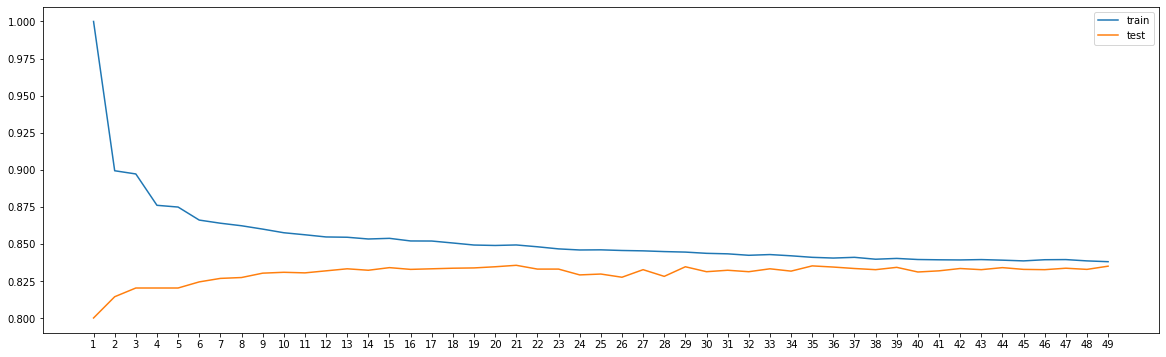

In [ ]:
# Ploteamos los valores de exactitud para nuestro dataset de entrenamiento y testeo.
plt.figure(figsize=(20,6))

plt.plot(n_neighbors, train_acc_scores2, label="train")
plt.plot(n_neighbors, test_acc_scores2,  label="test")
plt.xticks(n_neighbors)
plt.legend()

In [ ]:
# Entrenamos el knn con n_neighbors= 35 y cross validation
from sklearn.model_selection import cross_val_score

knn_final = KNeighborsClassifier(n_neighbors= 35, weights='uniform')
knn_cross = cross_val_score(knn_final, X2, y2, cv=10, scoring= 'accuracy')

acc_mean1 = knn_cross.mean()
acc_std_dev1 = knn_cross.std()

print(f'La exactitud media lograda a partir de un modelo de arbol de decisión fue: {acc_mean1} con un desvío estandar de {acc_std_dev1}')

La exactitud media lograda a partir de un modelo de arbol de decisión fue: 0.8329872643749233 con un desvío estandar de 0.007412088033157797


In [ ]:
knn_cross1 = cross_val_score(knn_final, X2, y2, cv=10, scoring= 'f1')

f1_mean1 = knn_cross1.mean()
f1_std_dev1 = knn_cross1.std()

print(f'El f-score medio logrado a partir de un modelo de arbol de decisión fue: {f1_mean1} con un desvío estandar de {f1_std_dev1}')

El f-score medio logrado a partir de un modelo de arbol de decisión fue: 0.6363029451848685 con un desvío estandar de 0.01219352715056767


#### Seleccion manual de features (correlación mayor a 20% con nuestro target)

In [ ]:
# Estandarizamos los datos para optimizar el resultado del modelo propuesto.
X3 = scaler.fit_transform(X1)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y2, test_size=0.2, random_state= 0, stratify= y2)

In [ ]:
# Generamos el modelo con distinto número de vecinos para buscar el óptimo
n_neighbors = np.arange(1, 50)
train_acc_scores3 = []
test_acc_scores3 = []

for i in n_neighbors:
  knn2 = KNeighborsClassifier(n_neighbors= i, weights='uniform')

  knn2.fit(X_train3, y_train3)
  train_preds = knn2.predict(X_train3)
  test_preds = knn2.predict(X_test3)

  train_acc_scores3.append(accuracy_score(y_train3, train_preds))
  test_acc_scores3.append(accuracy_score(y_test3, test_preds))

In [ ]:
# Ploteamos el clasification report del knn
from sklearn.metrics import classification_report
print(classification_report(y_test, knn2.predict(X_test3)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3818
           1       0.71      0.56      0.62      1279

    accuracy                           0.83      5097
   macro avg       0.79      0.74      0.76      5097
weighted avg       0.82      0.83      0.82      5097



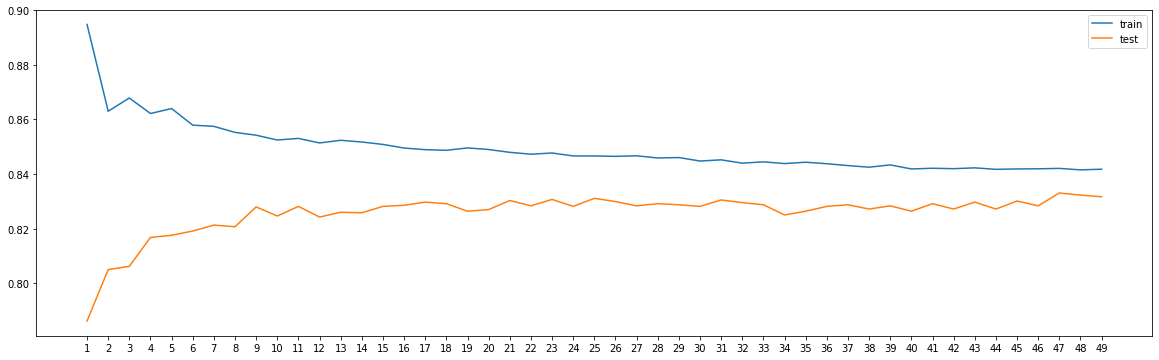

In [ ]:
# Ploteamos los valores de exactitud para nuestro dataset de entrenamiento y testeo.
plt.figure(figsize=(20,6))

plt.plot(n_neighbors, train_acc_scores3, label="train")
plt.plot(n_neighbors, test_acc_scores3,  label="test")
plt.xticks(n_neighbors)
plt.legend()

In [ ]:
# Entrenamos el knn con n_neighbors= 21 y cross validation
knn2_final = KNeighborsClassifier(n_neighbors= 21, weights='uniform')
knn_cross = cross_val_score(knn2_final, X3, y1, cv=10, scoring= 'accuracy')

acc_mean2 = knn_cross.mean()
acc_std_dev2 = knn_cross.std()

print(f'La exactitud media lograda a partir de un modelo de arbol de decisión fue: {acc_mean2} con un desvío estandar de {acc_std_dev2}')

La exactitud media lograda a partir de un modelo de arbol de decisión fue: 0.8349097562192334 con un desvío estandar de 0.006794462038875234


In [ ]:
knn_cross1 = cross_val_score(knn2_final, X3, y1, cv=10, scoring= 'f1')

f1_mean1 = knn_cross1.mean()
f1_std_dev1 = knn_cross1.std()

print(f'El f-score medio logrado a partir de un modelo de arbol de decisión fue: {f1_mean1} con un desvío estandar de {f1_std_dev1}')

El f-score medio logrado a partir de un modelo de arbol de decisión fue: 0.6451210222134793 con un desvío estandar de 0.017016881318987893


#### Optimizado de hiperparámetros con GridSearch.

In [ ]:
# Creamos un diccionario con los parámetros a optimizar y sus rangos
parametros2 = {
    'n_neighbors': list(np.arange(10, 41)),
    'weights': ['uniform', 'distance'],
}

In [ ]:
# Ejecutamos GridSearch con 10 CV y evaluando exactitud
knn3 = KNeighborsClassifier()
GridS2 = GridSearchCV(knn3, parametros2, n_jobs=-1, cv= 10, scoring= 'accuracy')
GridS2.fit(X_train3, y_train3)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                         20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(f"La mejor combinación de hiperparámetros es: {GridS2.best_params_}")

La mejor combinación de hiperparámetros es: {'n_neighbors': 27, 'weights': 'uniform'}


In [ ]:
# Mostramos el Clasification Report de nuestro modelo
test_preds = GridS2.predict(X_test3)
print(classification_report(y_test3, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3818
           1       0.69      0.56      0.62      1279

    accuracy                           0.83      5097
   macro avg       0.78      0.74      0.76      5097
weighted avg       0.82      0.83      0.82      5097



### Support Vector Machines

#### Benchmark

In [ ]:
# Importamos la librería de Support Vector Classifier
from sklearn.svm import SVC

In [ ]:
# Aplicamos el SVM a los datos escalados previamente cuando generamos un modelo de KNN
svm = SVC(C= 1, random_state= 0)
svm.fit(X_train2, y_train2)

test_preds = svm.predict(X_test2)

In [ ]:
acc = accuracy_score(y_test2, test_preds)
f_score = f1_score(y_test2, test_preds)

print(f'La exactitud lograda a partir de un modelo de Support Vector Machines fue: {acc}')
print(f'El f-score logrado a partir de un modelo de Support Vector Machines fue: {f_score}')

La exactitud lograda a partir de un modelo de Support Vector Machines fue: 0.8402982146360605
El f-score logrado a partir de un modelo de Support Vector Machines fue: 0.6262626262626263


#### Optimizado de hiperparámetros con GridSearch y selección de features

In [ ]:
# Creamos un diccionario con los parámetros a optimizar y sus rangos
parametros3 = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 3, 4, 5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [ ]:
# Ejecutamos GridSearch con 5 CV y evaluando exactitud
svm2 = SVC()
GridS3 = GridSearchCV(svm2, parametros3, n_jobs=-1, cv= 5, scoring= 'accuracy')
GridS3.fit(X_train3, y_train3)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1, 1.5, 2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print(f"La mejor combinación de hiperparámetros es: {GridS3.best_params_}")

La mejor combinación de hiperparámetros es: {'C': 0.6, 'kernel': 'rbf'}


In [ ]:
# Mostramos el Clasification Report de nuestro modelo
test_preds = GridS3.predict(X_test3)
print(classification_report(y_test3, test_preds))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      3818
           1       0.75      0.51      0.61      1279

    accuracy                           0.84      5097
   macro avg       0.80      0.73      0.75      5097
weighted avg       0.83      0.84      0.82      5097



### Random Forest

#### Optimizado de hiperparámetros con GridSearch y todos los features.

In [ ]:
# Importamos la libreria de Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creamos un diccionario con los parámetros a optimizar y sus rangos
parametros4 = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'max_depth': [10],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]
}

In [ ]:
# Ejecutamos GridSearch con 5 CV y evaluando exactitud
random_f = RandomForestClassifier()
GridS4 = GridSearchCV(random_f, parametros4, n_jobs=-1, cv= 5, scoring= 'accuracy')
GridS4.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]},
             scoring='accuracy')

In [ ]:
print(f"La mejor combinación de hiperparámetros es: {GridS4.best_params_}")

La mejor combinación de hiperparámetros es: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


In [ ]:
# Mostramos el Clasification Report de nuestro modelo
test_preds = GridS4.predict(X_test)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3818
           1       0.80      0.53      0.64      1279

    accuracy                           0.85      5097
   macro avg       0.83      0.74      0.77      5097
weighted avg       0.85      0.85      0.84      5097



In [ ]:
# Visualizamos la importancia de cada atributo en la clasificación (probar con el Grid4 y si no anda hacerlo con random_f)
#random_f.fit(X_train, y_train)

#random_f.feature_importance_
GridS4.feature_importance_

# Ordenamos el feature importance en un dataframe
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = X_train.columns
fi["IMPORTANCE"] = GridS4.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

## Predicción de ingresos

Predecimos los ingresos de los registros presentes en el dataset de testeo siendo 1 ingresos mayores a U$S 50.000 y 0 menores/iguales a esta cifra. Para ellos utilizamos el clasificador de K-NN con la totalidad de los atributos ya que presentó las mejores métricas de evaluación (exactitud y f-measure).

In [ ]:
PRED = GridS4.predict(df_test2)

In [ ]:
print(PRED.shape)

(4487,)


## Unión de dataset de testeo con predicciones.

In [ ]:
df_id = df_test2[['ID']]

In [ ]:
df_id

,ID
0,3643
2,9401
3,17903
4,5198
5,28766
...,...
4876,19468
4877,7554
4878,25076
4879,9731


In [ ]:
df_pred = pd.DataFrame(data= PRED, columns= ['PRED'])

In [ ]:
# Concatenamos el ID con el resultado de la predicción en un único Dataframe.
df_res = pd.concat([df_id, df_pred], axis= 1)

In [ ]:
df_res.head(20)

,ID,PRED
0,3643.0,0.0
1,NaN,0.0
2,9401.0,1.0
3,17903.0,1.0
4,5198.0,0.0
5,28766.0,0.0
6,4638.0,0.0
7,1487.0,0.0
8,20373.0,0.0
9,9811.0,0.0


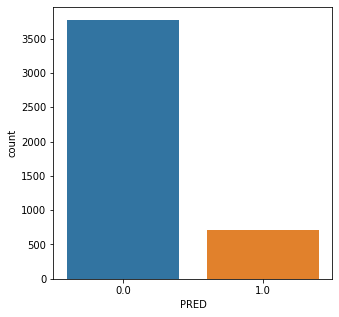

In [ ]:
# Ploteamos la variable income predicha
fig= plt.figure()
fig.set_size_inches(5, 5)
ax1 = plt.axes()
sns.countplot(x= 'PRED', data= df_res)

In [ ]:
# Porcentajes en el target
df_res['PRED'].value_counts(normalize=True)

0.0    0.840874
1.0    0.159126
Name: PRED, dtype: float64

## Archivo CSV con los resultados de la predicción final.

In [ ]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

df_res.to_csv("/content/drive/MyDrive/Doctorado/ICARO - Data Science/Practicos/Sprint 1/resultados1.csv", index=False)